## Installing Libraires

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pyodc: filename=pyodc-1.4.1-py3-none-any.whl size=30560 sha256=2090495232c0e0dc9e5cc3562bc4668e20b4ed7798e964d9f8b5035db0b2c725
  Stored in directory: c:\users\rutul\appdata\local\pip\cache\wheels\64\42\8d\94bd5036be2f054f688aaa41e27b4e7696631d6dd653e1a3d9
  Created wheel for findlibs: filename=findlibs-0.0.5-py3-none-any.whl size=6954 sha256=d6836a00a6d303b029233635b0b7d20244dcf26d3d717f3cfac2d07fe015bd96
  Stored in directory: c:\users\rutul\appdata\local\pip\cache\wheels\e5\eb\3a\fc9bb01081f51631725acecba7bbfcdd14a53765635ffe11f5
Successfu

## Importing Libraries

In [35]:
from sqlalchemy import create_engine
import numpy as np
import pandas as pd
import pyodbc
import matplotlib.pyplot as plt
import seaborn as sns


## Connecting to SSMS database

In [57]:
server = 'RUTULPATEL'
database = 'SupplyChainDataset'
driver = '{ODBC Driver 17 for SQL Server}'
connection_string = f'DRIVER={driver};SERVER={server};DATABASE={database};trusted_connection=yes'
conn = pyodbc.connect(connection_string)

In [62]:

df = pd.read_sql('SELECT * FROM DataCoSupplyChainDataset', conn)



C:\Users\Rutul\AppData\Local\Temp\ipykernel_33072\1538869441.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql('SELECT * FROM DataCoSupplyChainDataset', conn)


In [63]:
df.head()

,Type,Days_for_shipping_real,Days_for_shipment_scheduled,Benefit_per_order,Sales_per_customer,Delivery_Status,Late_delivery_risk,Category_Id,Category_Name,Customer_City,...,Order_Region,Order_State,Order_Status,Product_Card_Id,Product_Category_Id,Product_Name,Product_Price,Product_Status,shipping_date_DateOrders,Shipping_Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,False,73,Sporting Goods,Caguas,...,Southeast Asia,Java Occidental,COMPLETE,1360,73,Smart watch,327.75,0,2018-02-03 22:56:00,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,True,73,Sporting Goods,Caguas,...,South Asia,Rajast�n,PENDING,1360,73,Smart watch,327.75,0,2018-01-18 12:27:00,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,False,73,Sporting Goods,San Jose,...,South Asia,Rajast�n,CLOSED,1360,73,Smart watch,327.75,0,2018-01-17 12:06:00,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,False,73,Sporting Goods,Los Angeles,...,Oceania,Queensland,COMPLETE,1360,73,Smart watch,327.75,0,2018-01-16 11:45:00,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,False,73,Sporting Goods,Caguas,...,Oceania,Queensland,PENDING_PAYMENT,1360,73,Smart watch,327.75,0,2018-01-15 11:24:00,Standard Class


## Data Cleaning

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 48 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Type                         180519 non-null  object        
 1   Days_for_shipping_real       180519 non-null  int64         
 2   Days_for_shipment_scheduled  180519 non-null  int64         
 3   Benefit_per_order            180519 non-null  float64       
 4   Sales_per_customer           180519 non-null  float64       
 5   Delivery_Status              180519 non-null  object        
 6   Late_delivery_risk           180519 non-null  bool          
 7   Category_Id                  180519 non-null  int64         
 8   Category_Name                180519 non-null  object        
 9   Customer_City                180519 non-null  object        
 10  Customer_Country             180519 non-null  object        
 11  Customer_Fname            

In [68]:
print(df.describe())

       Days_for_shipping_real  Days_for_shipment_scheduled  Benefit_per_order  \
count           180519.000000                180519.000000      180519.000000   
mean                 3.497654                     2.931847          21.974989   
min                  0.000000                     0.000000       -4274.979980   
25%                  2.000000                     2.000000           7.000000   
50%                  3.000000                     4.000000          31.520000   
75%                  5.000000                     4.000000          64.800003   
max                  6.000000                     4.000000         911.799988   
std                  1.623722                     1.374449         104.433526   

       Sales_per_customer    Category_Id    Customer_Id  Customer_Zipcode  \
count       180519.000000  180519.000000  180519.000000     180516.000000   
mean           183.107609      31.851451    6691.379495      35921.126914   
min              7.490000       2.00000

In [66]:
df.isnull().sum()

Type                             0
Days_for_shipping_real           0
Days_for_shipment_scheduled      0
Benefit_per_order                0
Sales_per_customer               0
Delivery_Status                  0
Late_delivery_risk               0
Category_Id                      0
Category_Name                    0
Customer_City                    0
Customer_Country                 0
Customer_Fname                   0
Customer_Id                      0
Customer_Lname                   8
Customer_Segment                 0
Customer_State                   0
Customer_Street                  0
Customer_Zipcode                 3
Department_Id                    0
Department_Name                  0
Latitude                         9
Longitude                      105
Market                           0
Order_City                       0
Order_Country                    0
Order_Customer_Id                0
order_date_DateOrders            0
Order_Id                         0
Order_Item_Cardprod_

In [67]:
df.duplicated().sum()

0

### Handling incorrect/unsufficient/unnecessary data / Converting Datatypes / handling missing values

dropping Product status column

In [73]:
df.drop(['Product_Status'],axis=1, inplace=True)
df.shape

(180519, 47)

splitting datetime column to date and time columns

In [74]:
df['order_date'] = df['order_date_DateOrders'].dt.date
df['order_time'] = df['order_date_DateOrders'].dt.time

In [75]:
df['shipping_date'] = df['shipping_date_DateOrders'].dt.date
df['shipping_time'] = df['shipping_date_DateOrders'].dt.time

In [76]:
df.head()

,Type,Days_for_shipping_real,Days_for_shipment_scheduled,Benefit_per_order,Sales_per_customer,Delivery_Status,Late_delivery_risk,Category_Id,Category_Name,Customer_City,...,Product_Card_Id,Product_Category_Id,Product_Name,Product_Price,shipping_date_DateOrders,Shipping_Mode,order_date,order_time,shipping_date,shipping_time
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,False,73,Sporting Goods,Caguas,...,1360,73,Smart watch,327.75,2018-02-03 22:56:00,Standard Class,2018-01-31,22:56:00,2018-02-03,22:56:00
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,True,73,Sporting Goods,Caguas,...,1360,73,Smart watch,327.75,2018-01-18 12:27:00,Standard Class,2018-01-13,12:27:00,2018-01-18,12:27:00
2,CASH,4,4,-247.779999,309.720001,Shipping on time,False,73,Sporting Goods,San Jose,...,1360,73,Smart watch,327.75,2018-01-17 12:06:00,Standard Class,2018-01-13,12:06:00,2018-01-17,12:06:00
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,False,73,Sporting Goods,Los Angeles,...,1360,73,Smart watch,327.75,2018-01-16 11:45:00,Standard Class,2018-01-13,11:45:00,2018-01-16,11:45:00
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,False,73,Sporting Goods,Caguas,...,1360,73,Smart watch,327.75,2018-01-15 11:24:00,Standard Class,2018-01-13,11:24:00,2018-01-15,11:24:00


In [77]:
df.drop(['shipping_date_DateOrders','order_date_DateOrders'],axis=1,inplace=True)
df.shape

(180519, 49)

Handling Missing value of Customer Zipcode (Customer State=95758)

In [87]:
pd.set_option('display.max_columns', None)

In [ ]:
df.loc[df["Customer_State"] == '95758','Customer_Zipcode'] = df['Customer_State']


,Type,Days_for_shipping_real,Days_for_shipment_scheduled,Benefit_per_order,Sales_per_customer,Delivery_Status,Late_delivery_risk,Category_Id,Category_Name,Customer_City,...,Order_Status,Product_Card_Id,Product_Category_Id,Product_Name,Product_Price,Shipping_Mode,order_date,order_time,shipping_date,shipping_time
34863,DEBIT,2,1,66.379997,189.660004,Late delivery,True,65,Consumer Electronics,CA,...,COMPLETE,1352,65,Industrial consumer electronics,252.880005,First Class,2017-11-02,18:31:00,2017-11-04,18:31:00
45599,PAYMENT,4,4,10.910000,38.959999,Shipping on time,False,75,Video Games,CA,...,PENDING_PAYMENT,1362,75,Fighting video games,39.750000,Standard Class,2017-12-10,15:18:00,2017-12-14,15:18:00


In [90]:
df.loc[df['Customer_State']=='95758','Customer_State'] = df['Customer_City']

In [103]:
df[(df['Customer_State'] == 'CA') &  (df['Customer_Street'] == 'Elk Grove')]

,Type,Days_for_shipping_real,Days_for_shipment_scheduled,Benefit_per_order,Sales_per_customer,Delivery_Status,Late_delivery_risk,Category_Id,Category_Name,Customer_City,Customer_Country,Customer_Fname,Customer_Id,Customer_Lname,Customer_Segment,Customer_State,Customer_Street,Customer_Zipcode,Department_Id,Department_Name,Latitude,Longitude,Market,Order_City,Order_Country,Order_Customer_Id,Order_Id,Order_Item_Cardprod_Id,Order_Item_Discount,Order_Item_Discount_Rate,Order_Item_Id,Order_Item_Product_Price,Order_Item_Profit_Ratio,Order_Item_Quantity,Sales,Order_Item_Total,Order_Profit_Per_Order,Order_Region,Order_State,Order_Status,Product_Card_Id,Product_Category_Id,Product_Name,Product_Price,Shipping_Mode,order_date,order_time,shipping_date,shipping_time
34863,DEBIT,2,1,66.379997,189.660004,Late delivery,True,65,Consumer Electronics,CA,EE. UU.,Sara,14577,Foreman,Consumer,CA,Elk Grove,95758,10,Technology,39.134159,-123.718552,Europe,Valence,Francia,14577,71024,1352,63.220001,0.25,174339,252.880005,0.35,1,252.880005,189.660004,66.379997,Western Europe,Auvernia-R�dano-Alpes,COMPLETE,1352,65,Industrial consumer electronics,252.880005,First Class,2017-11-02,18:31:00,2017-11-04,18:31:00
45599,PAYMENT,4,4,10.910000,38.959999,Shipping on time,False,75,Video Games,CA,EE. UU.,Eugenia,17171,Slater,Corporate,CA,Elk Grove,95758,9,Discs Shop,38.408573,-121.449112,Pacific Asia,Manila,Filipinas,17171,73618,1362,0.800000,0.02,176933,39.750000,0.28,1,39.750000,38.959999,10.910000,Southeast Asia,Capital Nacional,PENDING_PAYMENT,1362,75,Fighting video games,39.750000,Standard Class,2017-12-10,15:18:00,2017-12-14,15:18:00


Handling Missing Values of Customer Zipcode (Customer State = 91732)

In [104]:
df.loc[df["Customer_State"] == '91732','Customer_Zipcode'] = df['Customer_State']
df.loc[df['Customer_State']=='91732','Customer_State'] = df['Customer_City']
df[(df['Customer_State'] == 'CA') &  (df['Customer_Street'] == 'El Monte')]

,Type,Days_for_shipping_real,Days_for_shipment_scheduled,Benefit_per_order,Sales_per_customer,Delivery_Status,Late_delivery_risk,Category_Id,Category_Name,Customer_City,Customer_Country,Customer_Fname,Customer_Id,Customer_Lname,Customer_Segment,Customer_State,Customer_Street,Customer_Zipcode,Department_Id,Department_Name,Latitude,Longitude,Market,Order_City,Order_Country,Order_Customer_Id,Order_Id,Order_Item_Cardprod_Id,Order_Item_Discount,Order_Item_Discount_Rate,Order_Item_Id,Order_Item_Product_Price,Order_Item_Profit_Ratio,Order_Item_Quantity,Sales,Order_Item_Total,Order_Profit_Per_Order,Order_Region,Order_State,Order_Status,Product_Card_Id,Product_Category_Id,Product_Name,Product_Price,Shipping_Mode,order_date,order_time,shipping_date,shipping_time
81670,DEBIT,4,4,59.990002,299.959991,Shipping on time,False,63,Children's Clothing,CA,EE. UU.,Zena,14046,Elliott,Consumer,CA,El Monte,91732,4,Apparel,34.071892,-118.013885,Europe,Sheffield,Reino Unido,14046,70493,1350,57.139999,0.16,173808,357.100006,0.2,1,357.100006,299.959991,59.990002,Northern Europe,Inglaterra,COMPLETE,1350,63,Children's heaters,357.100006,Standard Class,2017-10-26,00:29:00,2017-10-30,00:29:00


Handling Missing Values (Customer Last Name)

In [105]:
df['Customer_Lname'].fillna('Unknown',inplace=True)
df['Customer_Lname'].isnull().sum()

0

Initially i found missing values in this dataframe from latitude and longitude columns but after verfiying the source data(.csv) i found that there was some problem inserting data to SQL server which cause this problem as there were no missing values in latitude and longitude columns

## Loading Updated Dataset

In [3]:
server = 'RUTULPATEL'
database = 'DataCoSupplyChainDataset'
driver = '{ODBC Driver 17 for SQL Server}'
connection_string = f'DRIVER={driver};SERVER={server};DATABASE={database};trusted_connection=yes'
conn = pyodbc.connect(connection_string)

In [4]:
df = pd.read_sql('SELECT * FROM DataCoSupplyChainDataset', conn)


C:\Users\Rutul\AppData\Local\Temp\ipykernel_30820\1535712457.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql('SELECT * FROM DataCoSupplyChainDataset', conn)


In [5]:
df.head()

,Type,Days_for_shipping_real,Days_for_shipment_scheduled,Benefit_per_order,Sales_per_customer,Delivery_Status,Late_delivery_risk,Category_Id,Category_Name,Customer_City,...,Order_Region,Order_State,Order_Status,Product_Card_Id,Product_Category_Id,Product_Name,Product_Price,Product_Status,shipping_date_DateOrders,Shipping_Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,False,73,Sporting Goods,Caguas,...,Southeast Asia,Java Occidental,COMPLETE,1360,73,Smart watch,327.75,0,2018-02-03 22:56:00,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,True,73,Sporting Goods,Caguas,...,South Asia,Rajast�n,PENDING,1360,73,Smart watch,327.75,0,2018-01-18 12:27:00,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,False,73,Sporting Goods,San Jose,...,South Asia,Rajast�n,CLOSED,1360,73,Smart watch,327.75,0,2018-01-17 12:06:00,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,False,73,Sporting Goods,Los Angeles,...,Oceania,Queensland,COMPLETE,1360,73,Smart watch,327.75,0,2018-01-16 11:45:00,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,False,73,Sporting Goods,Caguas,...,Oceania,Queensland,PENDING_PAYMENT,1360,73,Smart watch,327.75,0,2018-01-15 11:24:00,Standard Class


In [6]:
pd.set_option('display.max_columns', None)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 48 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Type                         180519 non-null  object        
 1   Days_for_shipping_real       180519 non-null  int64         
 2   Days_for_shipment_scheduled  180519 non-null  int64         
 3   Benefit_per_order            180519 non-null  float64       
 4   Sales_per_customer           180519 non-null  float64       
 5   Delivery_Status              180519 non-null  object        
 6   Late_delivery_risk           180519 non-null  bool          
 7   Category_Id                  180519 non-null  int64         
 8   Category_Name                180519 non-null  object        
 9   Customer_City                180519 non-null  object        
 10  Customer_Country             180519 non-null  object        
 11  Customer_Fname            

In [8]:
print(df.describe())

       Days_for_shipping_real  Days_for_shipment_scheduled  Benefit_per_order  \
count           180519.000000                180519.000000      180519.000000   
mean                 3.497654                     2.931847          21.974989   
min                  0.000000                     0.000000       -4274.979980   
25%                  2.000000                     2.000000           7.000000   
50%                  3.000000                     4.000000          31.520000   
75%                  5.000000                     4.000000          64.800003   
max                  6.000000                     4.000000         911.799988   
std                  1.623722                     1.374449         104.433526   

       Sales_per_customer    Category_Id    Customer_Id  Customer_Zipcode  \
count       180519.000000  180519.000000  180519.000000     180516.000000   
mean           183.107609      31.851451    6691.379495      35921.126914   
min              7.490000       2.00000

In [9]:
df.isnull().sum()

Type                           0
Days_for_shipping_real         0
Days_for_shipment_scheduled    0
Benefit_per_order              0
Sales_per_customer             0
Delivery_Status                0
Late_delivery_risk             0
Category_Id                    0
Category_Name                  0
Customer_City                  0
Customer_Country               0
Customer_Fname                 0
Customer_Id                    0
Customer_Lname                 8
Customer_Segment               0
Customer_State                 0
Customer_Street                0
Customer_Zipcode               3
Department_Id                  0
Department_Name                0
Latitude                       0
Longitude                      0
Market                         0
Order_City                     0
Order_Country                  0
Order_Customer_Id              0
order_date_DateOrders          0
Order_Id                       0
Order_Item_Cardprod_Id         0
Order_Item_Discount            0
Order_Item

In [10]:
df.duplicated().sum()

0

### Handling incorrect/unsufficient/unnecessary data / Converting Datatypes / handling missing values

dropping Product status column

In [11]:
df.drop(['Product_Status'],axis=1, inplace=True)
df.shape

(180519, 47)

splitting datetime column to date and time columns

In [12]:
df['order_date'] = df['order_date_DateOrders'].dt.date
df['order_time'] = df['order_date_DateOrders'].dt.time

In [13]:
df['shipping_date'] = df['shipping_date_DateOrders'].dt.date
df['shipping_time'] = df['shipping_date_DateOrders'].dt.time

In [14]:
df.head()

,Type,Days_for_shipping_real,Days_for_shipment_scheduled,Benefit_per_order,Sales_per_customer,Delivery_Status,Late_delivery_risk,Category_Id,Category_Name,Customer_City,Customer_Country,Customer_Fname,Customer_Id,Customer_Lname,Customer_Segment,Customer_State,Customer_Street,Customer_Zipcode,Department_Id,Department_Name,Latitude,Longitude,Market,Order_City,Order_Country,Order_Customer_Id,order_date_DateOrders,Order_Id,Order_Item_Cardprod_Id,Order_Item_Discount,Order_Item_Discount_Rate,Order_Item_Id,Order_Item_Product_Price,Order_Item_Profit_Ratio,Order_Item_Quantity,Sales,Order_Item_Total,Order_Profit_Per_Order,Order_Region,Order_State,Order_Status,Product_Card_Id,Product_Category_Id,Product_Name,Product_Price,shipping_date_DateOrders,Shipping_Mode,order_date,order_time,shipping_date,shipping_time
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,False,73,Sporting Goods,Caguas,Puerto Rico,Cally,20755,Holloway,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,2018-01-31 22:56:00,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,1360,73,Smart watch,327.75,2018-02-03 22:56:00,Standard Class,2018-01-31,22:56:00,2018-02-03,22:56:00
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,True,73,Sporting Goods,Caguas,Puerto Rico,Irene,19492,Luna,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,2018-01-13 12:27:00,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajast�n,PENDING,1360,73,Smart watch,327.75,2018-01-18 12:27:00,Standard Class,2018-01-13,12:27:00,2018-01-18,12:27:00
2,CASH,4,4,-247.779999,309.720001,Shipping on time,False,73,Sporting Goods,San Jose,EE. UU.,Gillian,19491,Maldonado,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,2018-01-13 12:06:00,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajast�n,CLOSED,1360,73,Smart watch,327.75,2018-01-17 12:06:00,Standard Class,2018-01-13,12:06:00,2018-01-17,12:06:00
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,False,73,Sporting Goods,Los Angeles,EE. UU.,Tana,19490,Tate,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,2018-01-13 11:45:00,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,1360,73,Smart watch,327.75,2018-01-16 11:45:00,Standard Class,2018-01-13,11:45:00,2018-01-16,11:45:00
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,False,73,Sporting Goods,Caguas,Puerto Rico,Orli,19489,Hendricks,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,2018-01-13 11:24:00,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,1360,73,Smart watch,327.75,2018-01-15 11:24:00,Standard Class,2018-01-13,11:24:00,2018-01-15,11:24:00


In [15]:
df.drop(['shipping_date_DateOrders','order_date_DateOrders'],axis=1,inplace=True)
df.shape

(180519, 49)

Handling Missing value of Customer Zipcode (Customer State=95758)

In [16]:
pd.set_option('display.max_columns', None)

In [17]:
df.loc[df["Customer_State"] == '95758','Customer_Zipcode'] = df['Customer_State']


C:\Users\Rutul\AppData\Local\Temp\ipykernel_30820\2390075735.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['95758' '95758']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df["Customer_State"] == '95758','Customer_Zipcode'] = df['Customer_State']


In [18]:
df.loc[df['Customer_State']=='95758','Customer_State'] = df['Customer_City']

In [19]:
df[(df['Customer_State'] == 'CA') &  (df['Customer_Street'] == 'Elk Grove')]

,Type,Days_for_shipping_real,Days_for_shipment_scheduled,Benefit_per_order,Sales_per_customer,Delivery_Status,Late_delivery_risk,Category_Id,Category_Name,Customer_City,Customer_Country,Customer_Fname,Customer_Id,Customer_Lname,Customer_Segment,Customer_State,Customer_Street,Customer_Zipcode,Department_Id,Department_Name,Latitude,Longitude,Market,Order_City,Order_Country,Order_Customer_Id,Order_Id,Order_Item_Cardprod_Id,Order_Item_Discount,Order_Item_Discount_Rate,Order_Item_Id,Order_Item_Product_Price,Order_Item_Profit_Ratio,Order_Item_Quantity,Sales,Order_Item_Total,Order_Profit_Per_Order,Order_Region,Order_State,Order_Status,Product_Card_Id,Product_Category_Id,Product_Name,Product_Price,Shipping_Mode,order_date,order_time,shipping_date,shipping_time
35704,DEBIT,2,1,66.379997,189.660004,Late delivery,True,65,Consumer Electronics,CA,EE. UU.,Sara,14577,Foreman,Consumer,CA,Elk Grove,95758,10,Technology,39.134159,-123.718552,Europe,Valence,Francia,14577,71024,1352,63.220001,0.25,174339,252.880005,0.35,1,252.880005,189.660004,66.379997,Western Europe,Auvernia-R�dano-Alpes,COMPLETE,1352,65,Industrial consumer electronics,252.880005,First Class,2017-11-02,18:31:00,2017-11-04,18:31:00
46440,PAYMENT,4,4,10.910000,38.959999,Shipping on time,False,75,Video Games,CA,EE. UU.,Eugenia,17171,Slater,Corporate,CA,Elk Grove,95758,9,Discs Shop,38.408573,-121.449112,Pacific Asia,Manila,Filipinas,17171,73618,1362,0.800000,0.02,176933,39.750000,0.28,1,39.750000,38.959999,10.910000,Southeast Asia,Capital Nacional,PENDING_PAYMENT,1362,75,Fighting video games,39.750000,Standard Class,2017-12-10,15:18:00,2017-12-14,15:18:00


Handling Missing Values of Customer Zipcode (Customer State = 91732)

In [20]:
df.loc[df["Customer_State"] == '91732','Customer_Zipcode'] = df['Customer_State']
df.loc[df['Customer_State']=='91732','Customer_State'] = df['Customer_City']
df[(df['Customer_State'] == 'CA') &  (df['Customer_Street'] == 'El Monte')]

,Type,Days_for_shipping_real,Days_for_shipment_scheduled,Benefit_per_order,Sales_per_customer,Delivery_Status,Late_delivery_risk,Category_Id,Category_Name,Customer_City,Customer_Country,Customer_Fname,Customer_Id,Customer_Lname,Customer_Segment,Customer_State,Customer_Street,Customer_Zipcode,Department_Id,Department_Name,Latitude,Longitude,Market,Order_City,Order_Country,Order_Customer_Id,Order_Id,Order_Item_Cardprod_Id,Order_Item_Discount,Order_Item_Discount_Rate,Order_Item_Id,Order_Item_Product_Price,Order_Item_Profit_Ratio,Order_Item_Quantity,Sales,Order_Item_Total,Order_Profit_Per_Order,Order_Region,Order_State,Order_Status,Product_Card_Id,Product_Category_Id,Product_Name,Product_Price,Shipping_Mode,order_date,order_time,shipping_date,shipping_time
82511,DEBIT,4,4,59.990002,299.959991,Shipping on time,False,63,Children's Clothing,CA,EE. UU.,Zena,14046,Elliott,Consumer,CA,El Monte,91732,4,Apparel,34.071892,-118.013886,Europe,Sheffield,Reino Unido,14046,70493,1350,57.139999,0.16,173808,357.100006,0.2,1,357.100006,299.959991,59.990002,Northern Europe,Inglaterra,COMPLETE,1350,63,Children's heaters,357.100006,Standard Class,2017-10-26,00:29:00,2017-10-30,00:29:00


Handling Missing Values (Customer Last Name)

In [21]:
df['Customer_Lname'].fillna('Unknown',inplace=True)
df['Customer_Lname'].isnull().sum()

0

In [22]:
df.isnull().sum()

Type                           0
Days_for_shipping_real         0
Days_for_shipment_scheduled    0
Benefit_per_order              0
Sales_per_customer             0
Delivery_Status                0
Late_delivery_risk             0
Category_Id                    0
Category_Name                  0
Customer_City                  0
Customer_Country               0
Customer_Fname                 0
Customer_Id                    0
Customer_Lname                 0
Customer_Segment               0
Customer_State                 0
Customer_Street                0
Customer_Zipcode               0
Department_Id                  0
Department_Name                0
Latitude                       0
Longitude                      0
Market                         0
Order_City                     0
Order_Country                  0
Order_Customer_Id              0
Order_Id                       0
Order_Item_Cardprod_Id         0
Order_Item_Discount            0
Order_Item_Discount_Rate       0
Order_Item

## Outlier Detection

In [23]:
df.describe()

,Days_for_shipping_real,Days_for_shipment_scheduled,Benefit_per_order,Sales_per_customer,Category_Id,Customer_Id,Department_Id,Latitude,Longitude,Order_Customer_Id,Order_Id,Order_Item_Cardprod_Id,Order_Item_Discount,Order_Item_Discount_Rate,Order_Item_Id,Order_Item_Product_Price,Order_Item_Profit_Ratio,Order_Item_Quantity,Sales,Order_Item_Total,Order_Profit_Per_Order,Product_Card_Id,Product_Category_Id,Product_Price
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000
mean,3.497654,2.931847,21.974989,183.107609,31.851451,6691.379495,5.443460,29.719955,-84.915675,6691.379495,36221.894903,692.509764,20.664741,0.101668,90260.000000,141.232550,0.120647,2.127638,203.772096,183.107609,21.974989,692.509764,31.851451,141.232550
std,1.623722,1.374449,104.433526,120.043670,15.640064,4162.918106,1.629246,9.813646,21.433241,4162.918106,21045.379569,336.446807,21.800901,0.070415,52111.490959,139.732492,0.466796,1.453451,132.273077,120.043670,104.433526,336.446807,15.640064,139.732492
min,0.000000,0.000000,-4274.979980,7.490000,2.000000,1.000000,2.000000,-33.937553,-158.025986,1.000000,1.000000,19.000000,0.000000,0.000000,1.000000,9.990000,-2.750000,1.000000,9.990000,7.490000,-4274.979980,19.000000,2.000000,9.990000
25%,2.000000,2.000000,7.000000,104.379997,18.000000,3258.500000,4.000000,18.265432,-98.446312,3258.500000,18057.000000,403.000000,5.400000,0.040000,45130.500000,50.000000,0.080000,1.000000,119.980003,104.379997,7.000000,403.000000,18.000000,50.000000
50%,3.000000,4.000000,31.520000,163.990005,29.000000,6457.000000,5.000000,33.144863,-76.847908,6457.000000,36140.000000,627.000000,14.000000,0.100000,90260.000000,59.990002,0.270000,1.000000,199.919998,163.990005,31.520000,627.000000,29.000000,59.990002
75%,5.000000,4.000000,64.800003,247.399994,45.000000,9779.000000,7.000000,39.279617,-66.370583,9779.000000,54144.000000,1004.000000,29.990000,0.160000,135389.500000,199.990005,0.360000,3.000000,299.950012,247.399994,64.800003,1004.000000,45.000000,199.990005
max,6.000000,4.000000,911.799988,1939.989990,76.000000,20757.000000,12.000000,48.781933,115.263077,20757.000000,77204.000000,1363.000000,500.000000,0.250000,180519.000000,1999.989990,0.500000,5.000000,1999.989990,1939.989990,911.799988,1363.000000,76.000000,1999.989990


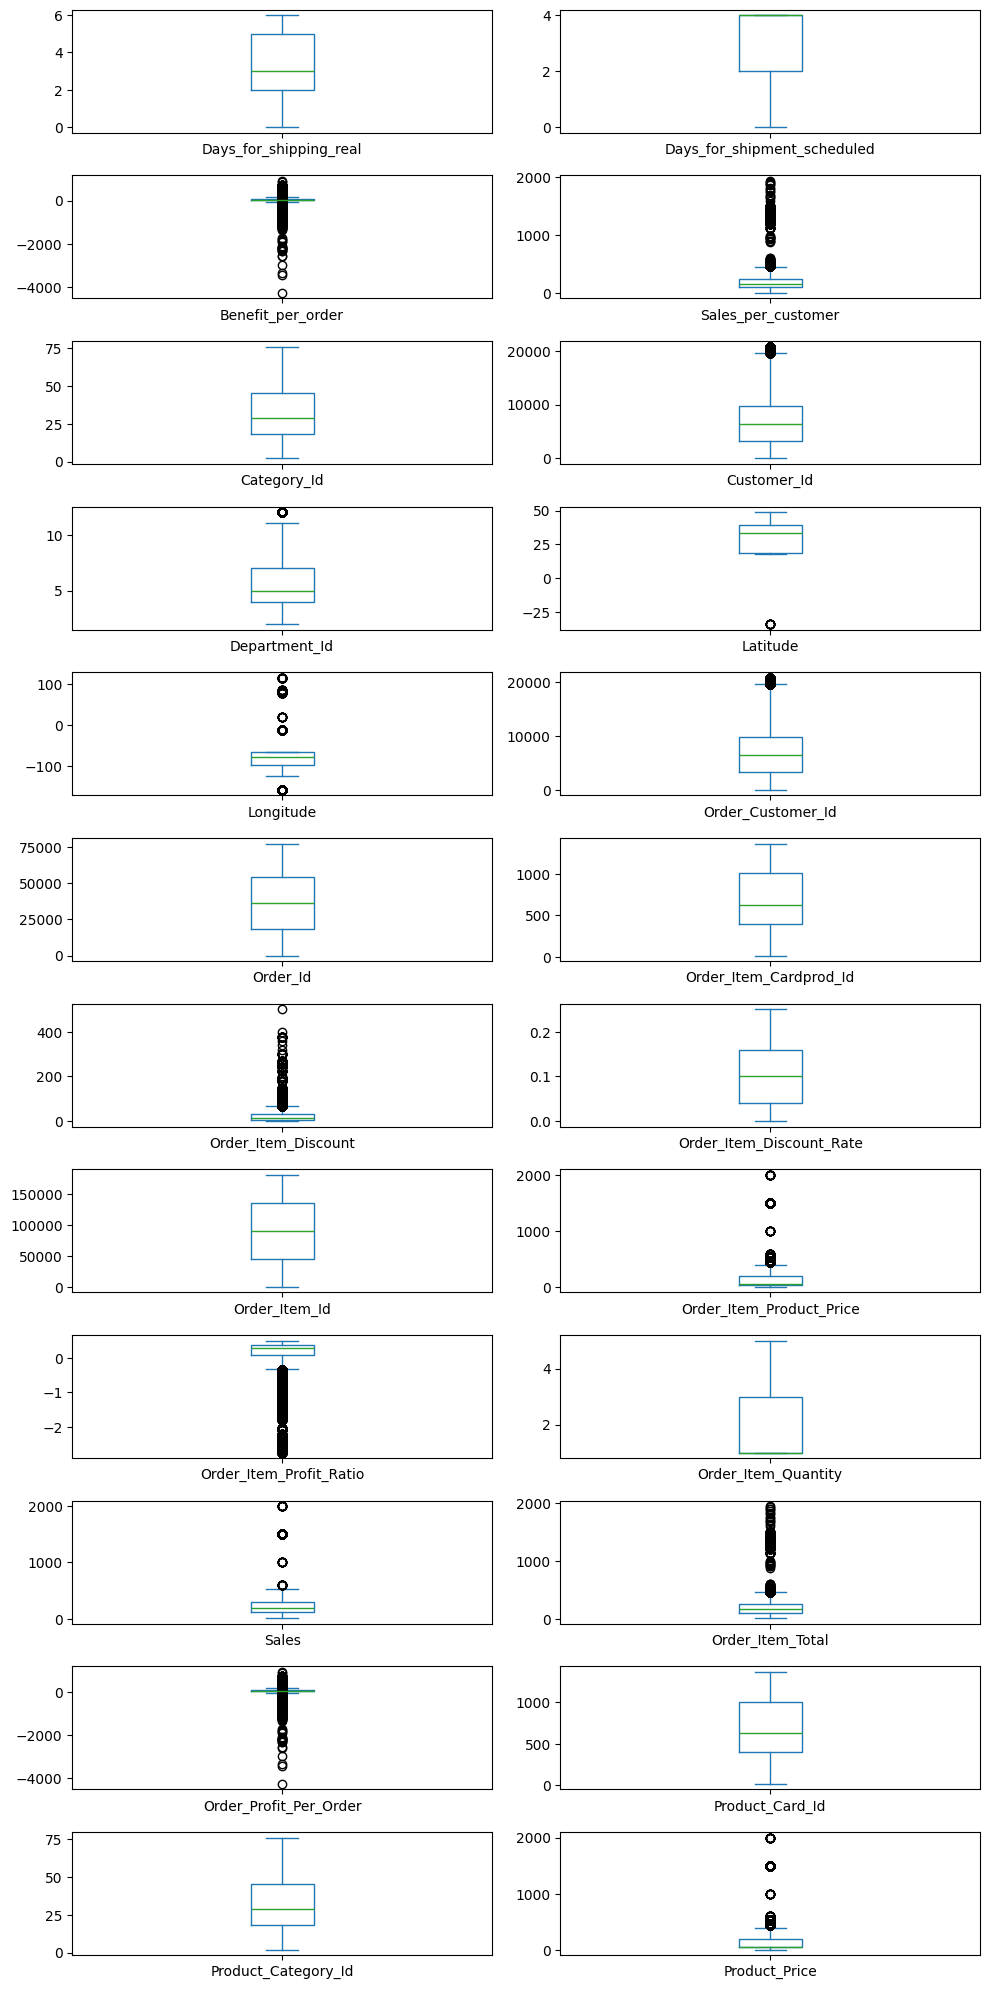

In [30]:
#Outlier Detection
numerical_columns = df.select_dtypes(include=['number']).columns
df[numerical_columns].plot(kind='box',subplots = True,layout = (12,2), figsize =(10,20))
plt.tight_layout()
plt.show()


C:\Users\Rutul\AppData\Local\Temp\ipykernel_30820\2820287653.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True,fill=False)


<Figure size 1200x800 with 0 Axes>

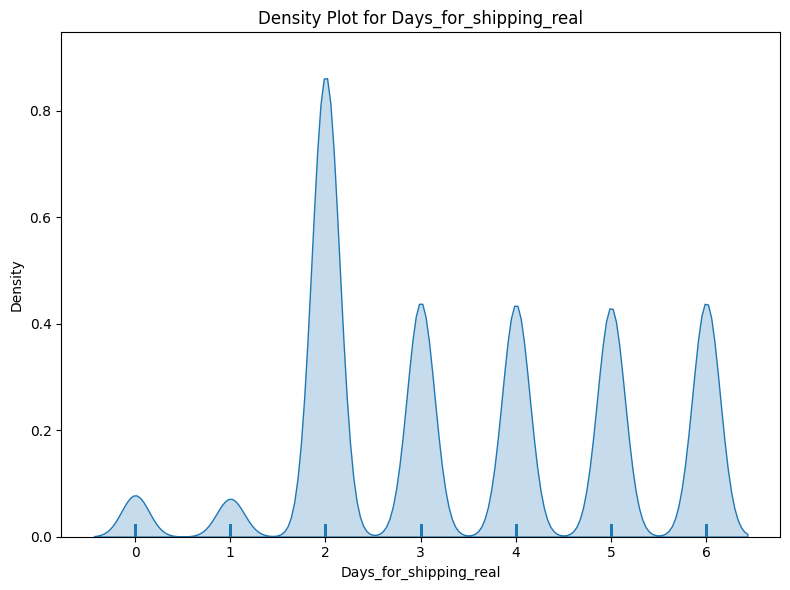

C:\Users\Rutul\AppData\Local\Temp\ipykernel_30820\2820287653.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True,fill=False)


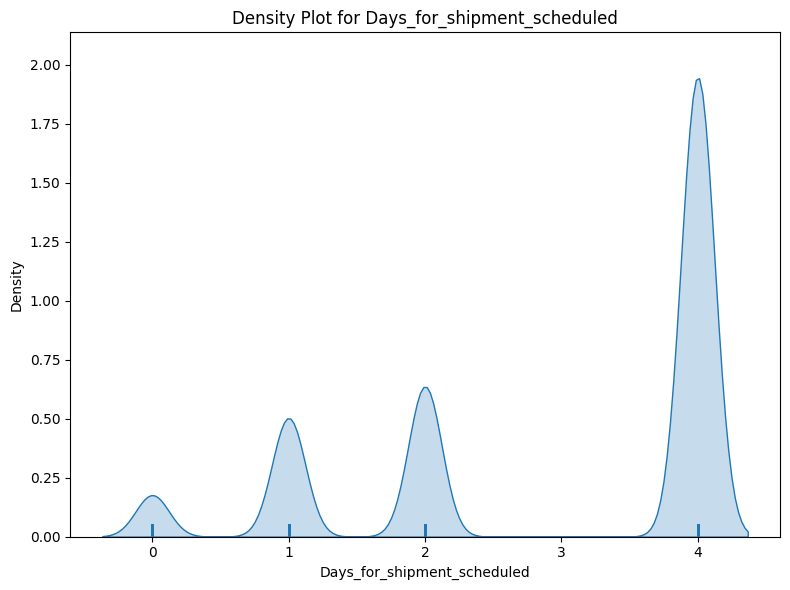

C:\Users\Rutul\AppData\Local\Temp\ipykernel_30820\2820287653.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True,fill=False)


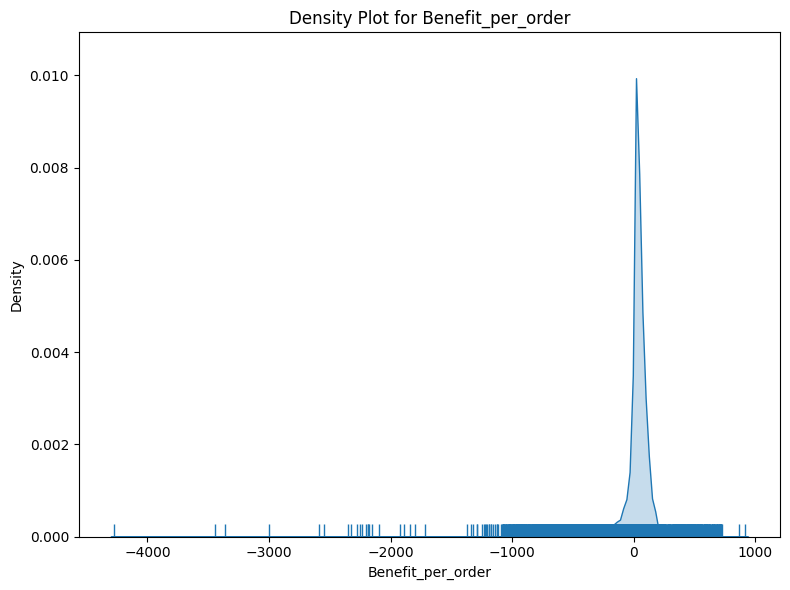

C:\Users\Rutul\AppData\Local\Temp\ipykernel_30820\2820287653.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True,fill=False)


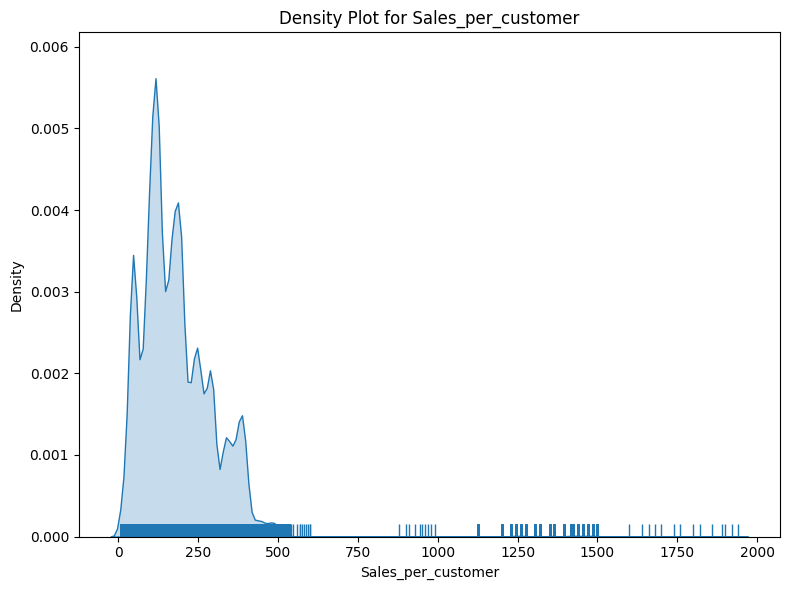

C:\Users\Rutul\AppData\Local\Temp\ipykernel_30820\2820287653.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True,fill=False)


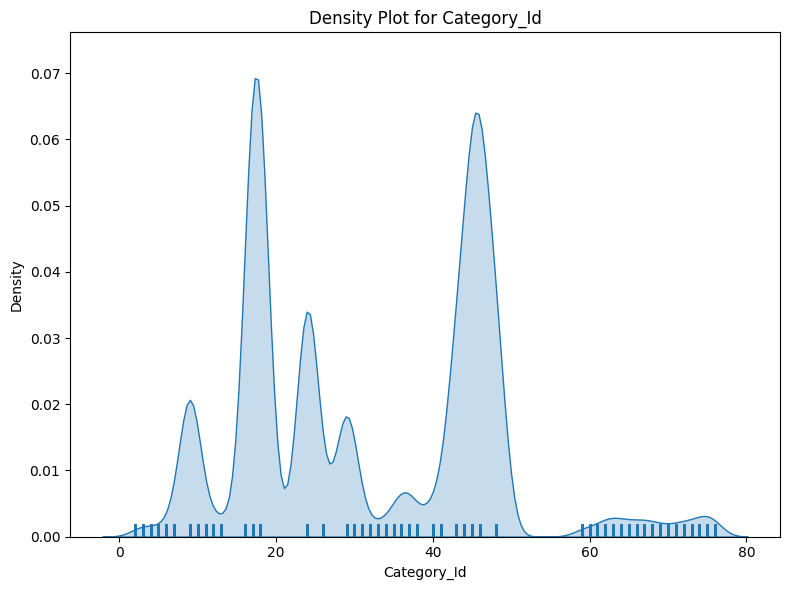

C:\Users\Rutul\AppData\Local\Temp\ipykernel_30820\2820287653.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True,fill=False)


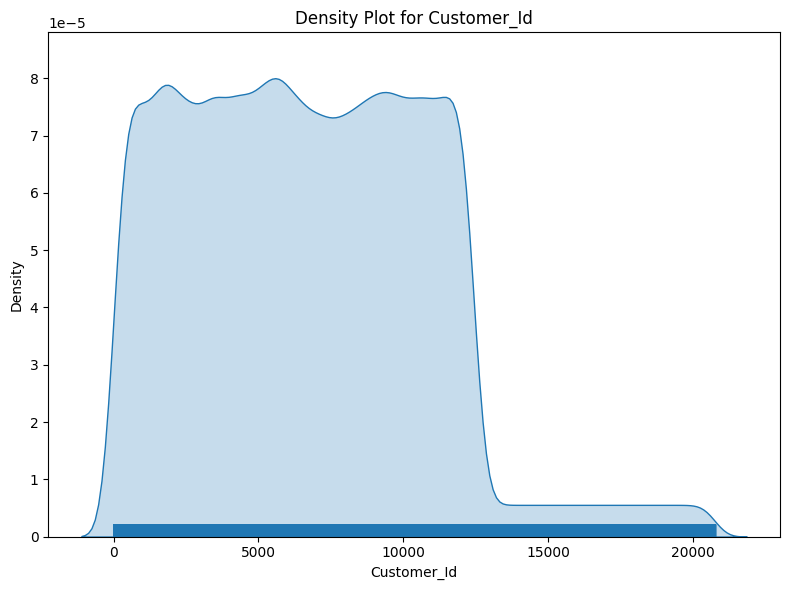

C:\Users\Rutul\AppData\Local\Temp\ipykernel_30820\2820287653.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True,fill=False)


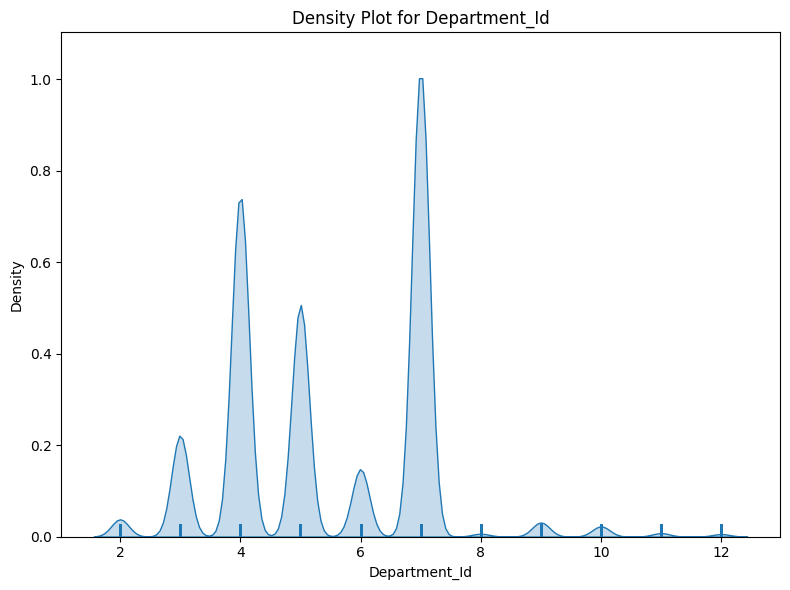

C:\Users\Rutul\AppData\Local\Temp\ipykernel_30820\2820287653.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True,fill=False)


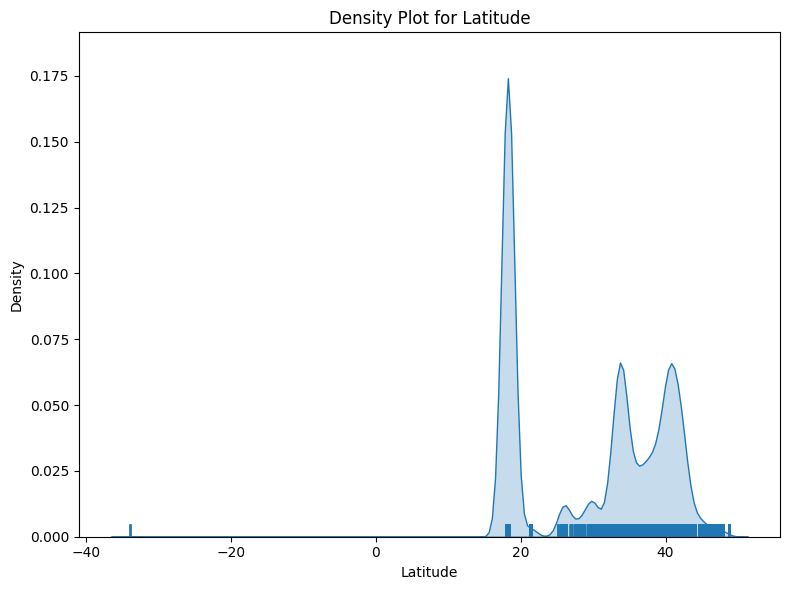

C:\Users\Rutul\AppData\Local\Temp\ipykernel_30820\2820287653.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True,fill=False)


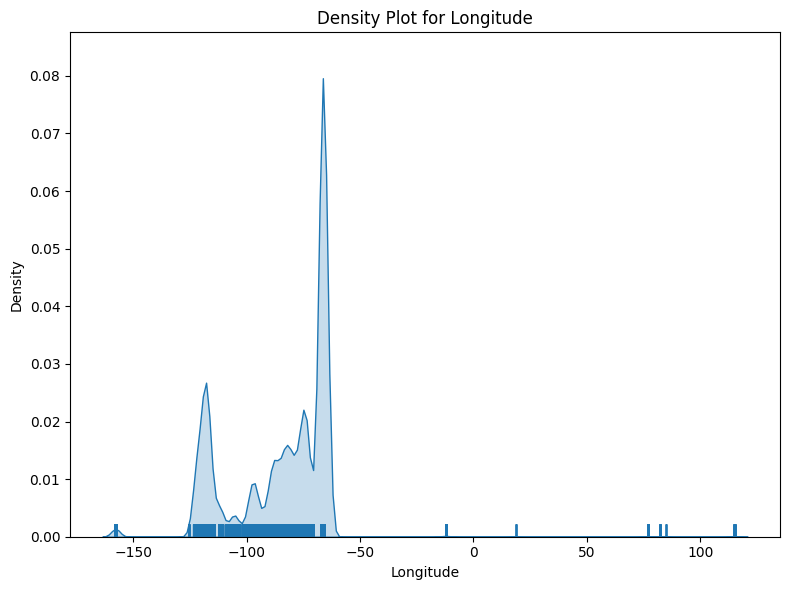

C:\Users\Rutul\AppData\Local\Temp\ipykernel_30820\2820287653.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True,fill=False)


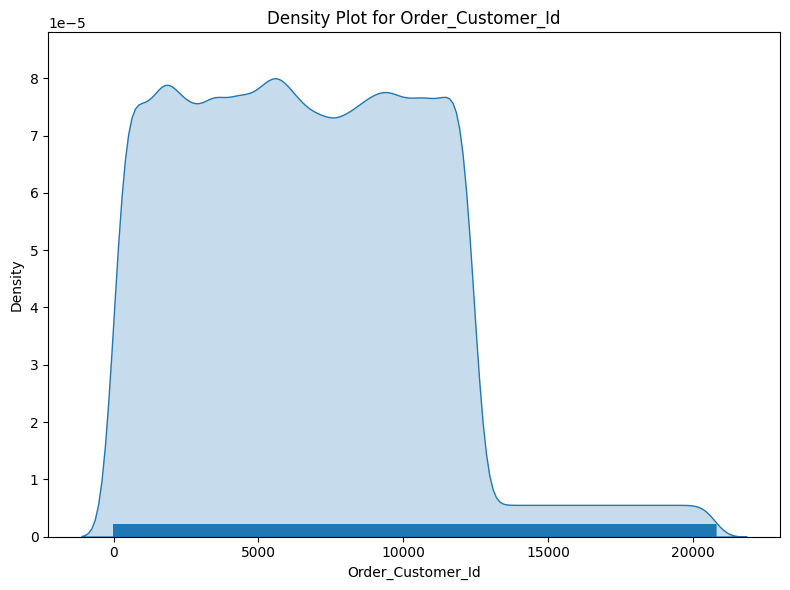

C:\Users\Rutul\AppData\Local\Temp\ipykernel_30820\2820287653.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True,fill=False)


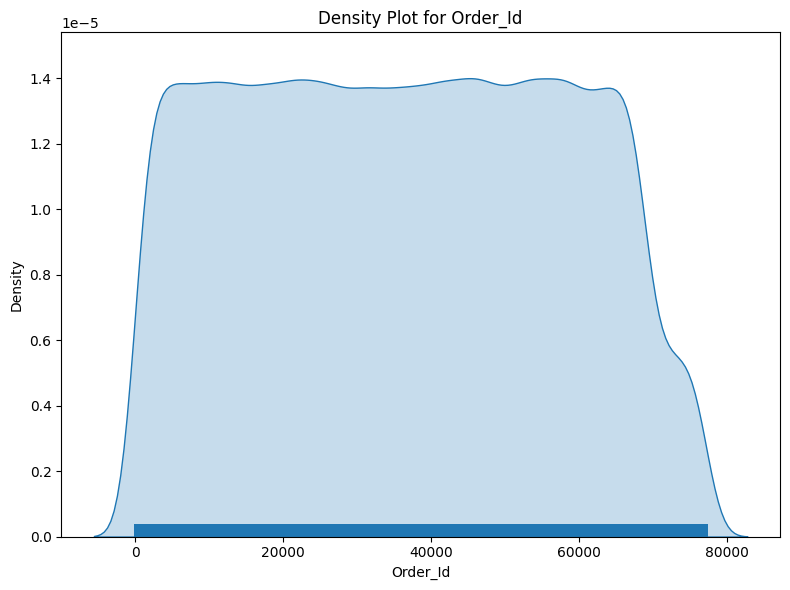

C:\Users\Rutul\AppData\Local\Temp\ipykernel_30820\2820287653.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True,fill=False)


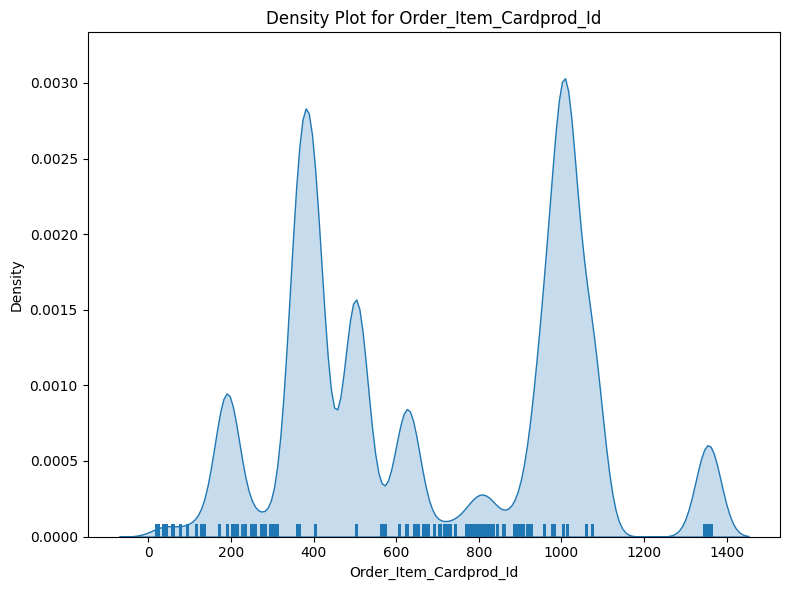

C:\Users\Rutul\AppData\Local\Temp\ipykernel_30820\2820287653.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True,fill=False)


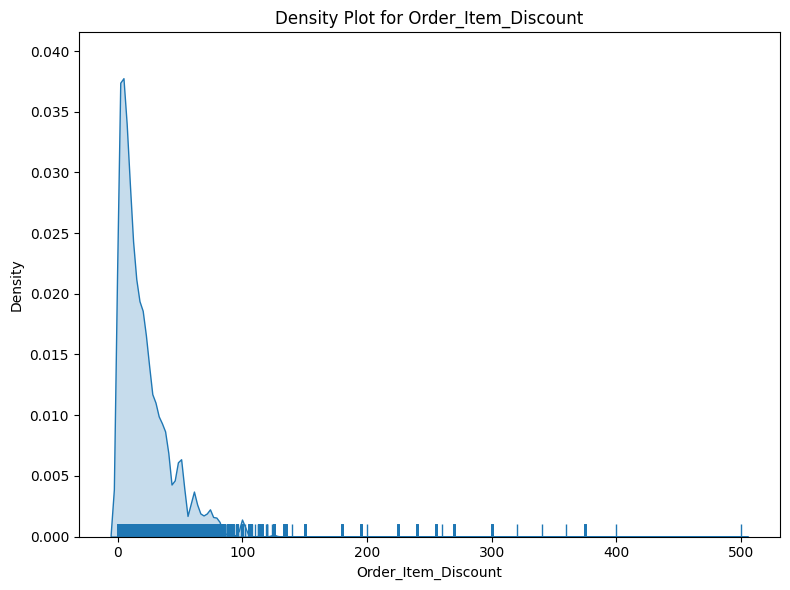

C:\Users\Rutul\AppData\Local\Temp\ipykernel_30820\2820287653.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True,fill=False)


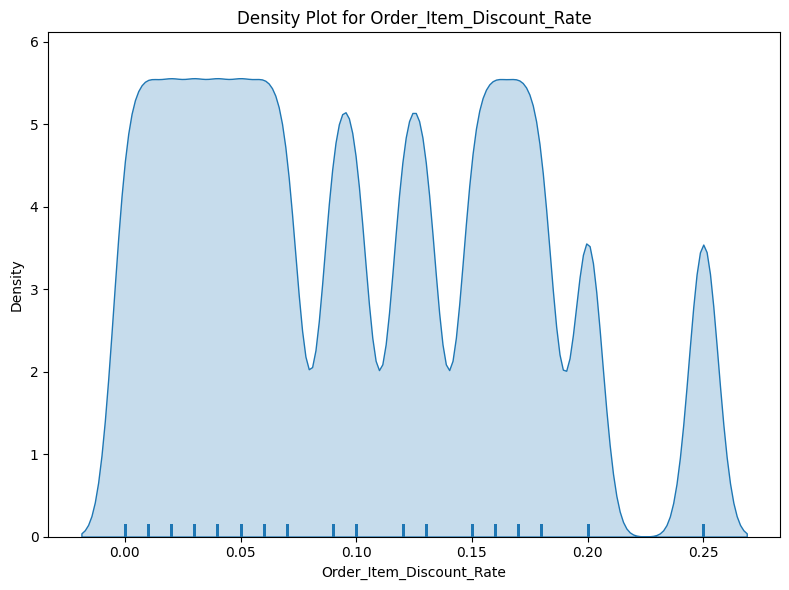

C:\Users\Rutul\AppData\Local\Temp\ipykernel_30820\2820287653.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True,fill=False)


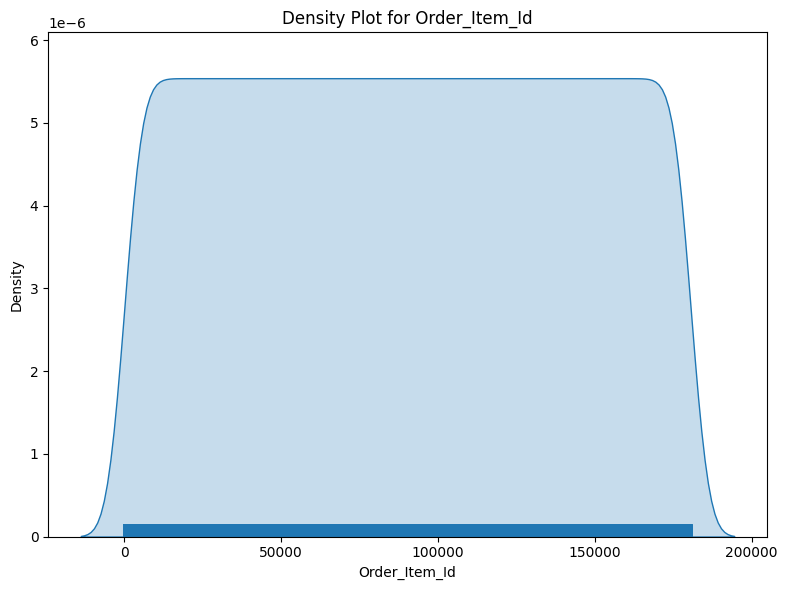

C:\Users\Rutul\AppData\Local\Temp\ipykernel_30820\2820287653.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True,fill=False)


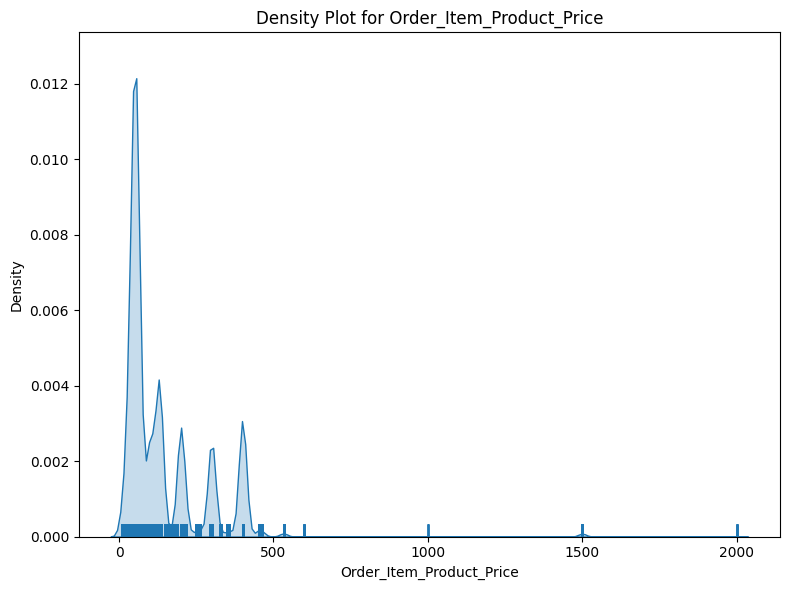

C:\Users\Rutul\AppData\Local\Temp\ipykernel_30820\2820287653.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True,fill=False)


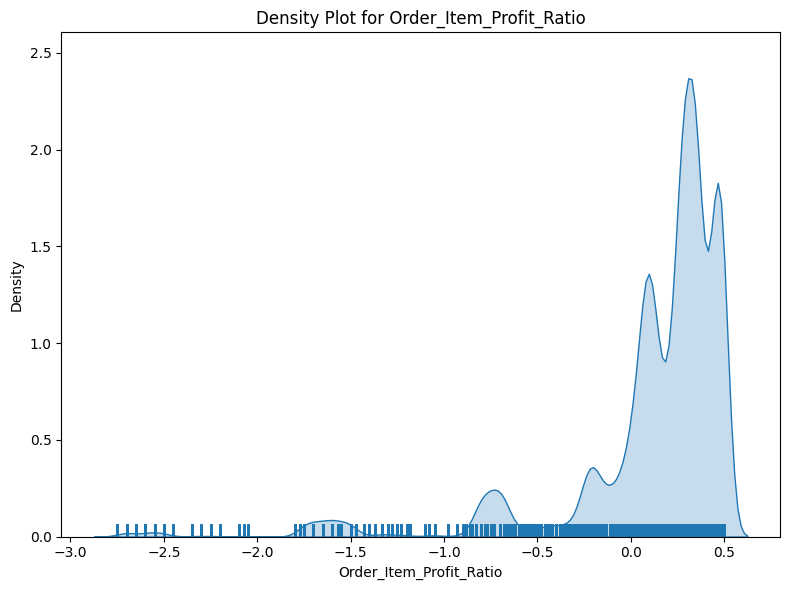

C:\Users\Rutul\AppData\Local\Temp\ipykernel_30820\2820287653.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True,fill=False)


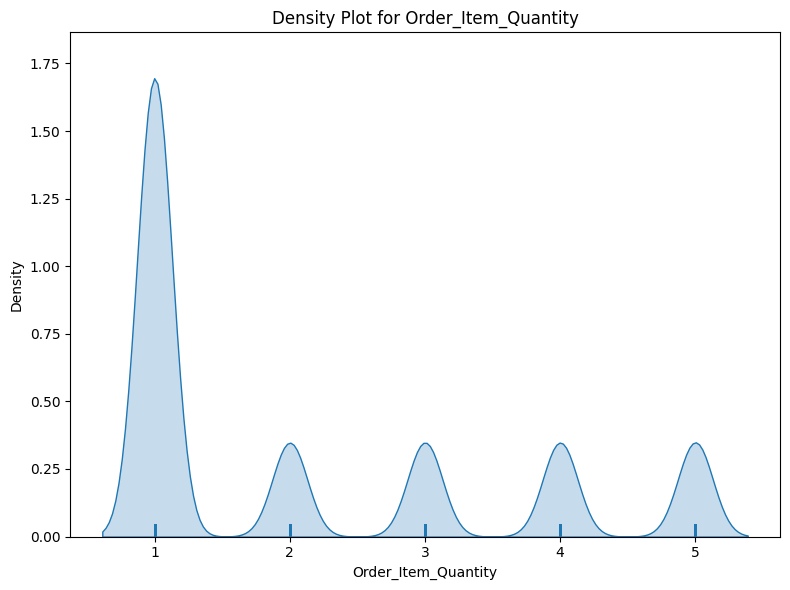

C:\Users\Rutul\AppData\Local\Temp\ipykernel_30820\2820287653.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True,fill=False)


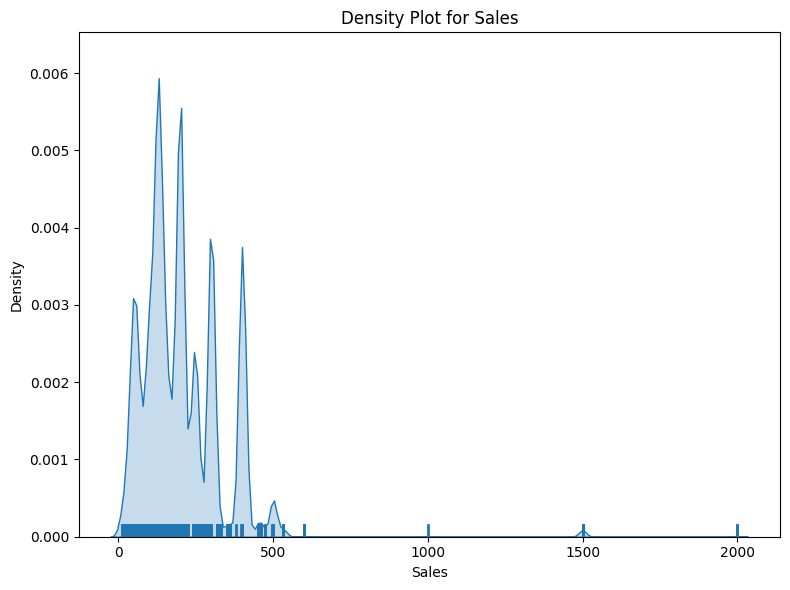

C:\Users\Rutul\AppData\Local\Temp\ipykernel_30820\2820287653.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True,fill=False)


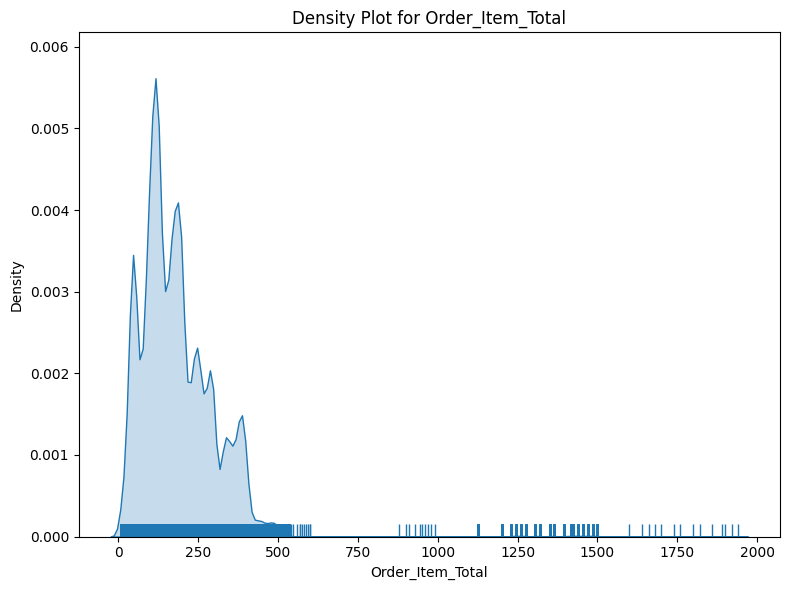

C:\Users\Rutul\AppData\Local\Temp\ipykernel_30820\2820287653.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True,fill=False)


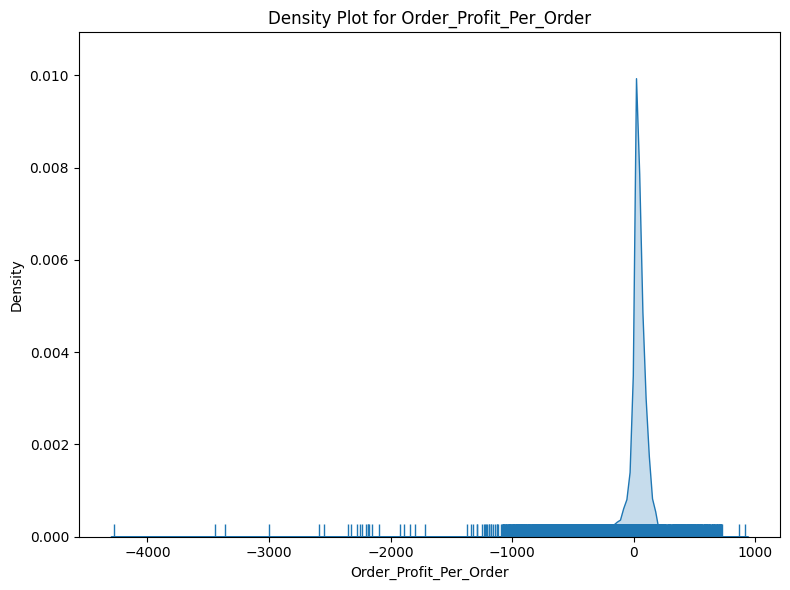

C:\Users\Rutul\AppData\Local\Temp\ipykernel_30820\2820287653.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True,fill=False)


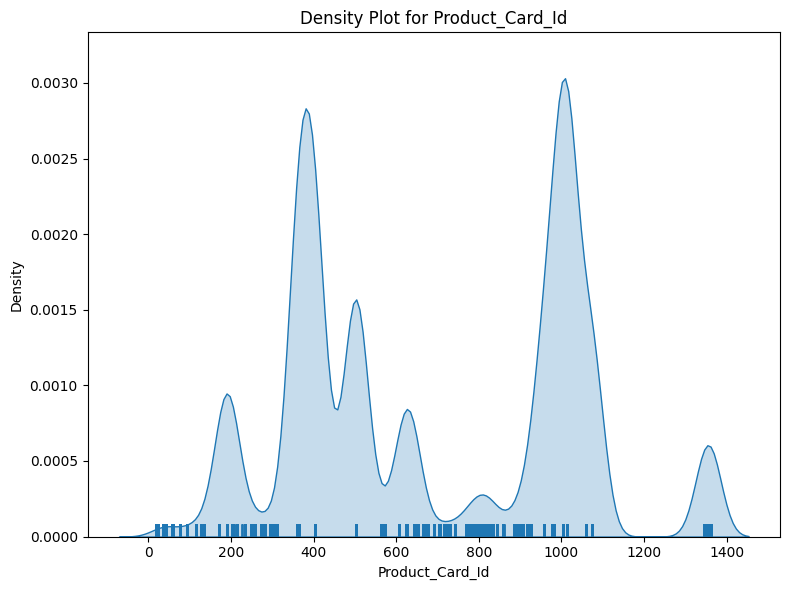

C:\Users\Rutul\AppData\Local\Temp\ipykernel_30820\2820287653.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True,fill=False)


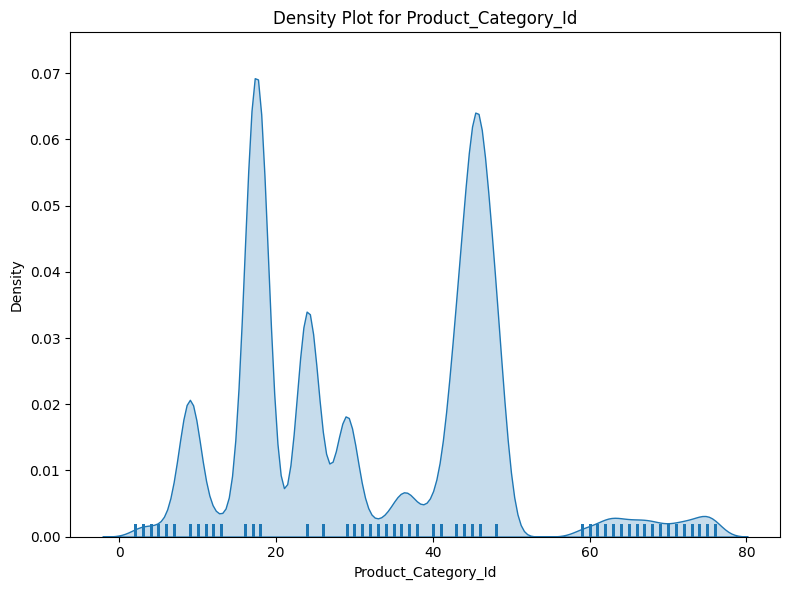

C:\Users\Rutul\AppData\Local\Temp\ipykernel_30820\2820287653.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True,fill=False)


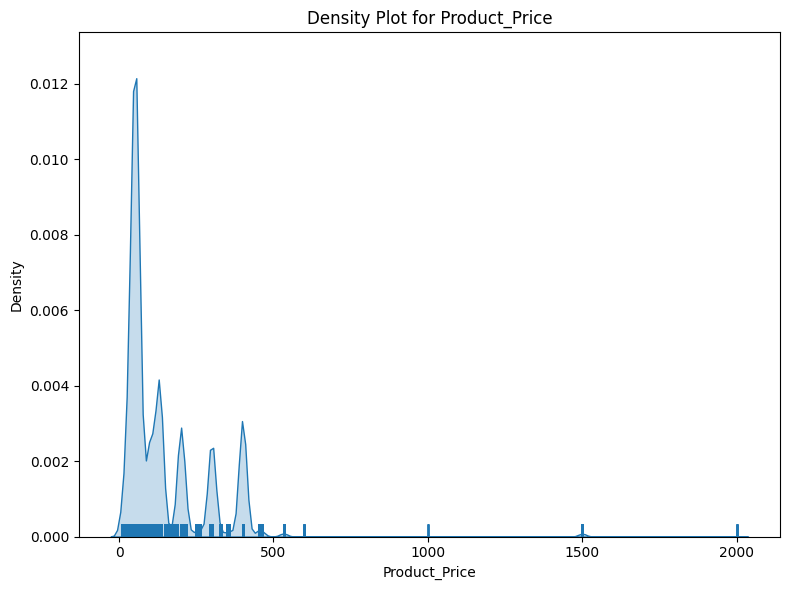

In [31]:
#Outlier detection
plt.figure(figsize=(12, 8))
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.kdeplot(df[col], shade=True,fill=False)
    sns.rugplot(df[col])
    plt.title(f'Density Plot for {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.tight_layout()
    plt.show()

## EXPLORATORY DATA ANALYSIS

### KPI : Total Sales

In [37]:
Total_Sales=df["Sales_per_customer"].sum()

In [39]:
df['Order_Item_Total'].sum()

33054402.380095482

In [42]:
print("Total Sales: ",np.round(Total_Sales,2))

Total Sales:  33054402.38


### KPI : Total Orders

In [43]:
Total_Orders = df["Order_Item_Quantity"].sum()
print("Total Orders: ",Total_Orders)

Total Orders:  384079


### KPI : Profit Margin

In [45]:
Total_Profit = df["Benefit_per_order"].sum()
Profit_Margin = (Total_Profit/Total_Sales)*(100)
print("Profit Margin: ",np.round(Profit_Margin, 2))

Profit Margin:  12.0


### KPI : Late Dilevery Risk

In [52]:
Total_Late_Delivery = df[df["Late_delivery_risk"] == 1].shape[0]
late_risk_percentage = (Total_Late_Delivery / df["Late_delivery_risk"].shape[0]) * 100
print(f"Late Delivery Risk: {late_risk_percentage:.2f}%")

Late Delivery Risk: 54.83%


### KPI: Top Performing Category

In [55]:
df.groupby("Category_Name")["Sales_per_customer"].sum().sort_values(ascending=False).head(5)

Category_Name
Fishing             6.226935e+06
Cleats              3.982857e+06
Camping & Hiking    3.700784e+06
Cardio Equipment    3.320251e+06
Women's Apparel     2.828708e+06
Name: Sales_per_customer, dtype: float64